### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data=pd.read_csv('Data-2.csv')
item=pd.read_csv('item.csv')
user=pd.read_csv('user.csv')

In [3]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [5]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [6]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [7]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [10]:
# Data dataset details

print('Data_info', data.info())
print(' ')
print('Data_shape', data.shape)
print(' ')
print('Data_describe', data.describe())
print(' ')
print('Data_missing_value',data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Data_info None
 
Data_shape (100000, 4)
 
Data_describe             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  

In [11]:
# Item dataset details

print('item_info', item.info())
print(' ')
print('item_shape', item.shape)
print(' ')
print('item_describe', item.describe())
print(' ')
print('item_missing_value',item.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
# User dataset details

print('user_info', user.info())
print(' ')
print('user_shape', user.shape)
print(' ')
print('user_describe', user.describe())
print(' ')
print('user_mising_value',user.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
user_info None
 
user_shape (943, 5)
 
user_describe           user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
 
user_mising_value 0


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [13]:
# use sum on the default axis

item.sum(axis=0,skipna=True)[3:]

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: object

#### 5. Find the movies that have more than one genre - 5 marks

In [14]:
#hint: use sum on the axis = 1


sum_genre=item.iloc[:,2:].sum(axis=1)


item['total_Genre'] = sum_genre
item

sum_genre[sum_genre > 1]
item.groupby(['movie title'])['total_Genre'].sum().sort_values(ascending = False ).head(10)
item [ item['total_Genre'] > 1 ].iloc[1:801]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_Genre
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1508,"Babysitter, The",01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1513,1515,Wings of Courage,01-Jan-1995,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1517,1519,New Jersey Drive,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
1519,1521,Mr. Wonderful,01-Jan-1993,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2


In [15]:
item_movie=item.iloc[1:801]

item_movie.shape

(800, 23)

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [16]:
item.drop('unknown',axis=1,inplace=True)

In [17]:
item.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_Genre
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3


In [18]:
item.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'total_Genre'],
      dtype='object')

In [19]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [20]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [21]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [22]:
#your answers here

item['release year']=item['release date'].apply(lambda x:x.split('-')[-1])
item.head(10)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_Genre,release year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1995
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1995
7,8,Babe,01-Jan-1995,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1995
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,1996


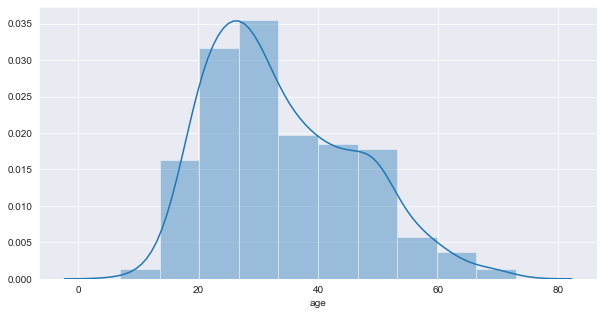

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(user['age'],bins=10,label='AGE');

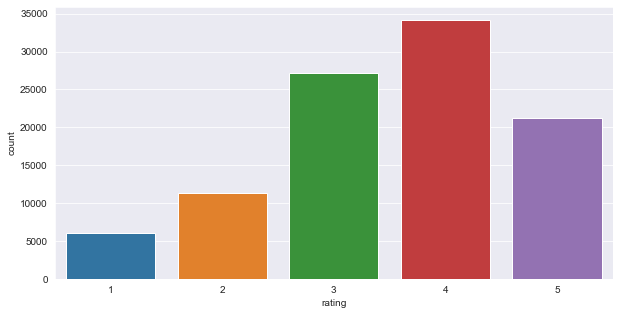

In [24]:
plt.figure(figsize=(10,5))

sns.countplot(x='rating',data=data);

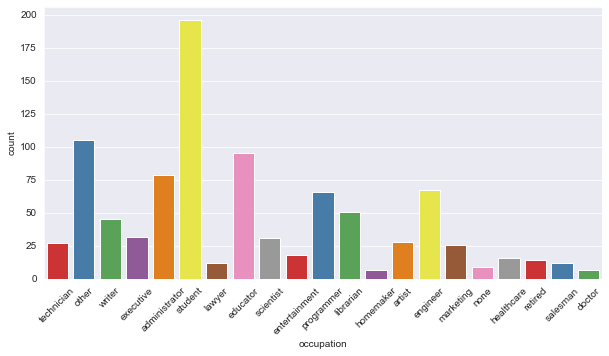

In [25]:
plt.figure(figsize=(10,5))

chart=sns.countplot(x='occupation',data=user,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

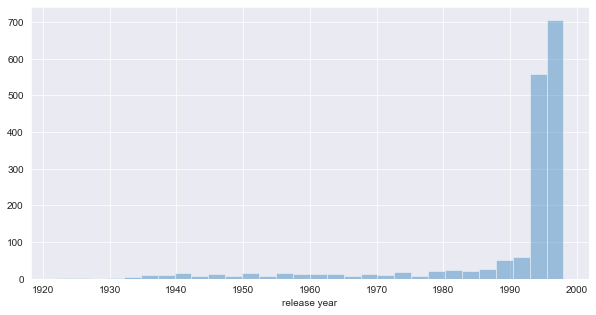

In [26]:
plt.figure(figsize=(10,5))

sns.distplot(item['release year'].astype('int'),bins=30,kde=False)
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [27]:
#Your answer here

item.head()

heat = item[['release year','Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']].groupby('release year').sum()
          

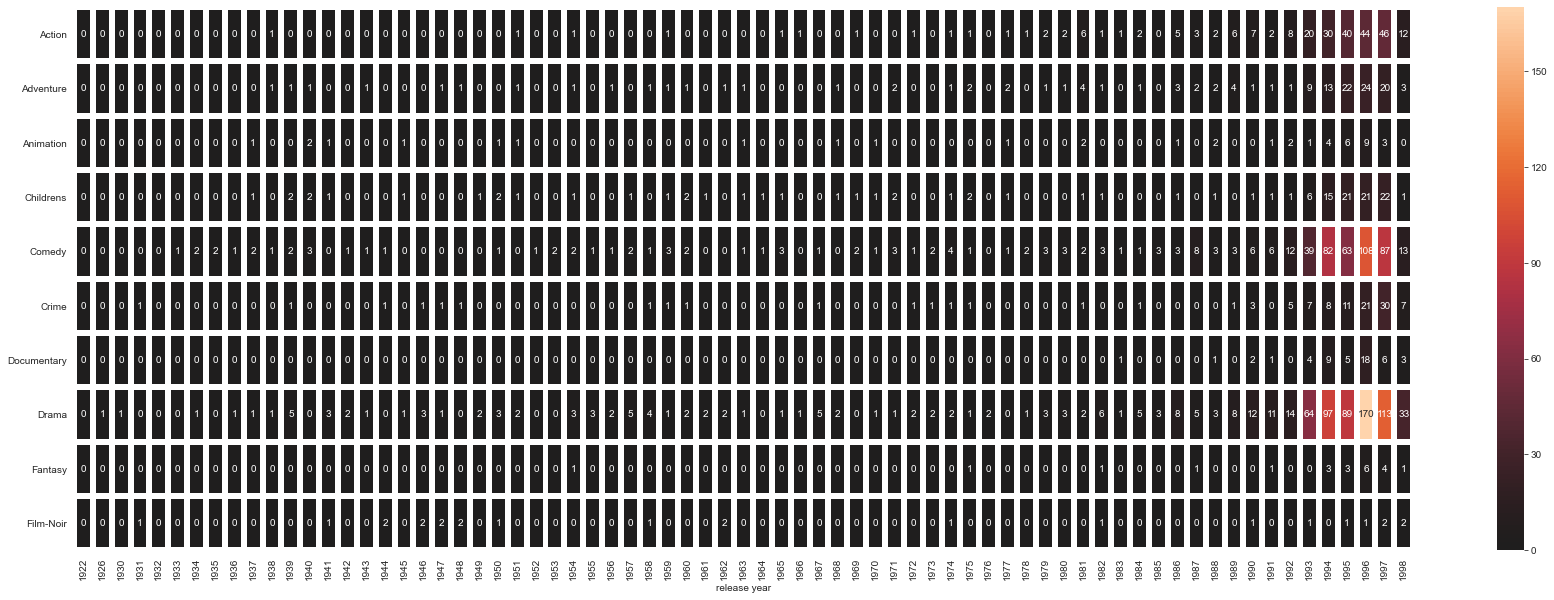

In [28]:
plt.figure(figsize=(30,10))

ax=sns.heatmap(heat.T.head(10), annot=True,linewidths=5,fmt='d',center=1)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [29]:
#your answer here

movie_ratings=pd.merge(item,data,how='left',left_on='movie id',right_on='movie id')
movie_ratings.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'total_Genre', 'release year',
       'user id', 'rating', 'timestamp'],
      dtype='object')

In [30]:
movie_ratings.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,total_Genre,release year,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,3,1995,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,3,1995,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,3,1995,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,3,1995,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,3,1995,66,3,883601324


In [31]:
ratings=movie_ratings.groupby('movie title').agg({'rating':[np.size,np.mean]})

ratings.sort_values([('rating','mean')],ascending=False).head(50)

atleas_100=ratings['rating']['size']> 100
atleas_100

ratings[ratings['rating']['size']> 100]
ratings[atleas_100].sort_values([('rating','mean')],ascending=False).reset_index()[:25]

movie title rating          
                                                        size      mean
0                                     Close Shave, A     112  4.491071
1                                   Schindler's List     298  4.466443
2                                Wrong Trousers, The     118  4.466102
3                                         Casablanca     243  4.456790
4                          Shawshank Redemption, The     283  4.445230
5                                        Rear Window     209  4.387560
6                                Usual Suspects, The     267  4.385768
7                                          Star Wars     583  4.358491
8                                       12 Angry Men     125  4.344000
9                                       Citizen Kane     198  4.292929
10                             To Kill a Mockingbird     219  4.292237
11                   One Flew Over the Cuckoo's Nest     264  4.291667
12                         Silence of the Lambs, The     390  4.289744
13                                North by Northwest     179  4.284916
14                                    Godfather, The     413  4.283293
15                                    Secrets & Lies     162  4.265432
16                                 Good Will Hunting     198  4.262626
17                         Manchurian Candidate, The     131  4.259542
18  Dr. Strangelove or: How I Learned to Stop Worr...    194  4.252577
19                           Raiders of the Lost Ark     420  4.252381
20                                           Vertigo     179  4.251397
21                                           Titanic     350  4.245714
22                                Lawrence of Arabia     173  4.231214
23                               Maltese Falcon, The     138  4.210145
24                          Empire Strikes Back, The     367  4.204360

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [32]:
movie_ratings.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'total_Genre', 'release year',
       'user id', 'rating', 'timestamp'],
      dtype='object')

In [33]:
item.columns
user.head()
movie_ratings.tail()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,total_Genre,release year,user id,rating,timestamp
99986,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1998,863,1,889289570
99987,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,1,0,1,0,0,2,1998,863,3,889289491
99988,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,1,0,0,0,0,2,1998,863,2,889289570
99989,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1994,896,3,887160722
99990,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1996,916,3,880845755


In [34]:
movie_gender=movie_ratings.merge(user)

In [35]:
total_no_movieDramaFemale=movie_gender.groupby(['gender'])['Drama'].sum()
total_no_movieDramaFemale=total_no_movieDramaFemale[0]
print('total_no_movieDramaFemale: ', total_no_movieDramaFemale)

total_no_movieDramaFemale:  11008


In [36]:
total_no_movieDramaMen=movie_gender.groupby(['gender'])['Drama'].sum()
total_no_movieDramaMen=total_no_movieDramaMen[1]
print('total_no_movieDramaMen: ', total_no_movieDramaMen)

total_no_movieDramaMen:  28887


In [37]:
total_no_moiveSeenFM = movie_gender['gender'].value_counts()

total_no_moiveSeenFemale=total_no_moiveSeenFM['F']
print('total_no_moiveSeenFemale: ',total_no_moiveSeenFemale)

total_no_moiveSeenMen=total_no_moiveSeenFM['M']
print('total_no_moiveSeenMen: ',total_no_moiveSeenMen)

total_no_moiveSeenFemale:  25738
total_no_moiveSeenMen:  74253


In [38]:
perc_female_watch_drama = total_no_movieDramaFemale/total_no_moiveSeenFemale
print('perc_female_watch_drama: ',perc_female_watch_drama)

perc_men_watch_drama = total_no_movieDramaMen/total_no_moiveSeenMen
print('perc_men_watch_drama: ',perc_men_watch_drama)

perc_female_watch_drama:  0.4276944595539669
perc_men_watch_drama:  0.38903478647327383


In [39]:
if perc_men_watch_drama > perc_female_watch_drama:
    print("YES --> Men watch more drama than women")
else:
    print ("NO --> Men watch more drama than women")

NO --> Men watch more drama than women


### Women watch more Sci-Fi than men

In [40]:
total_no_movieSciFiFemale=movie_gender.groupby(['gender'])['Sci-Fi'].sum()
total_no_movieSciFiFemale=total_no_movieSciFiFemale[0]
print('total_no_movieSciFiFemale: ', total_no_movieSciFiFemale)

total_no_movieSciFiFemale:  2629


In [41]:
total_no_movieSciFiMen=movie_gender.groupby(['gender'])['Sci-Fi'].sum()
total_no_movieSciFiMen=total_no_movieSciFiMen[1]
print('total_no_movieSciFiMen: ', total_no_movieSciFiMen)

total_no_movieSciFiMen:  10101


In [42]:
perc_female_watch_SciFi = total_no_movieSciFiFemale/total_no_moiveSeenFemale
print('perc_female_watch_SciFi: ',perc_female_watch_SciFi)

perc_men_watch_SciFi = total_no_movieSciFiMen/total_no_moiveSeenMen
print('perc_men_watch_SciFi: ',perc_men_watch_SciFi)

perc_female_watch_SciFi:  0.10214468878700754
perc_men_watch_SciFi:  0.13603490768049775


In [43]:
if perc_men_watch_SciFi > perc_female_watch_SciFi:
    print("YES --> Women watch more Sci-Fi than men")
else:
    print("NO  --> Women watch more Sci-Fi than men")

YES --> Women watch more Sci-Fi than men


### Men watch more Romance than women

In [44]:
total_no_movieRomanceFemale=movie_gender.groupby(['gender'])['Romance'].sum()
total_no_movieRomanceFemale=total_no_movieRomanceFemale[0]
print('total_no_movieRomanceFemale: ', total_no_movieRomanceFemale)

total_no_movieRomanceFemale:  5858


In [45]:
total_no_movieRomanceMen=movie_gender.groupby(['gender'])['Romance'].sum()
total_no_movieRomanceMen=total_no_movieRomanceMen[1]
print('total_no_movieRomanceMen: ', total_no_movieRomanceMen)

total_no_movieRomanceMen:  13603


In [46]:
perc_female_watch_Romance = total_no_movieRomanceFemale/total_no_moiveSeenFemale
print('perc_female_watch_Romance: ',perc_female_watch_Romance)

perc_men_watch_Romance = total_no_movieRomanceMen/total_no_moiveSeenMen
print('perc_men_watch_Romance: ',perc_men_watch_Romance)

perc_female_watch_Romance:  0.22760121221540136
perc_men_watch_Romance:  0.18319798526658856


In [47]:
if perc_female_watch_Romance > perc_men_watch_Romance:
    print("YES --> Men watch more Romance than women")
else:
    print("NO --> Men watch more Romance than women")
        

YES --> Men watch more Romance than women


#### Conclusion:



#write the conclusions here

## I find out the more than genre movie in the given dataset.

## Visualize the genre, how over the year is changing the movies.

## Trying to calculate, rating more than 100 whose given in gender and analysis and provide the output.

## As per my analysis in this dataset, movie watching people distribution different across the genre are:

##     •	Men watch more drama than women
##     •	Women watch more Sci-Fi than men
##     •	Men watch more Romance than women

